### 8.1 分组统计与转换

#### 1.分组统计

In [46]:
import pandas as pd
d={'No':['BS001','BS002','BS005','BS007','BS009','BS012'],
   'age':[18,21,23,19,28,22],
   'gpa':[2.5,2.2,3.2,3.1,2.2,2.5],
   'gender':['F','M','M','M','F','F'],
   'major':['EC','TR','EC','TR','TR','EC']}
s_df=pd.DataFrame(d)
s_df

,No,age,gender,gpa,major
0,BS001,18,F,2.5,EC
1,BS002,21,M,2.2,TR
2,BS005,23,M,3.2,EC
3,BS007,19,M,3.1,TR
4,BS009,28,F,2.2,TR
5,BS012,22,F,2.5,EC


In [3]:
s_df.groupby(s_df ['major'])['age'].mean()

major
EC    21.000000
TR    22.666667
Name: age, dtype: float64

In [4]:
s_df.groupby([s_df ['major'], s_df ['gender']])[['age','gpa']].mean()

age   gpa
major gender           
EC    F        20  2.50
      M        23  3.20
TR    F        28  2.20
      M        20  2.65

In [5]:
s_df.groupby(s_df ['major'])[['age','gpa']].agg(['mean','std','count'])

age                       gpa                
            mean       std count      mean       std count
major                                                     
EC     21.000000  2.645751     3  2.733333  0.404145     3
TR     22.666667  4.725816     3  2.500000  0.519615     3

In [6]:
s_df.groupby(s_df['major']).agg({'age':{'age_s':'sum','age_std':'std'},'gpa':{'gpa_c':'count'}})

age         gpa
        age_std age_s gpa_c
major                      
EC     2.645751    63     3
TR     4.725816    68     3

In [7]:
s_df.groupby(s_df ['major'],as_index=False)[['age','gpa']].mean()

,major,age,gpa
0,EC,21.000000,2.733333
1,TR,22.666667,2.500000


#### 2.分组对象迭代与选取

In [8]:
mg= s_df.groupby(s_df ['major'])
for major,group in mg:
    print(major)
    print(group)

EC
      No  age gender  gpa major
0  BS001   18      F  2.5    EC
2  BS005   23      M  3.2    EC
5  BS012   22      F  2.5    EC
TR
      No  age gender  gpa major
1  BS002   21      M  2.2    TR
3  BS007   19      M  3.1    TR
4  BS009   28      F  2.2    TR


In [9]:
mg2= s_df.groupby([s_df ['major'], s_df ['gender']])
for key,group in mg2:
    print(key)
    print(group)

('EC', 'F')
      No  age gender  gpa major
0  BS001   18      F  2.5    EC
5  BS012   22      F  2.5    EC
('EC', 'M')
      No  age gender  gpa major
2  BS005   23      M  3.2    EC
('TR', 'F')
      No  age gender  gpa major
4  BS009   28      F  2.2    TR
('TR', 'M')
      No  age gender  gpa major
1  BS002   21      M  2.2    TR
3  BS007   19      M  3.1    TR


In [19]:
print(mg2.get_group(('EC', 'M')))

      No  age gender  gpa major
2  BS005   23      M  3.2    EC


#### 3.分组级转换

In [21]:
df1=s_df.groupby(s_df['major'],as_index=False)['gpa'].mean()
df1['gpa_mean']=df1['gpa']
del df1['gpa']
df1

,major,gpa_mean
0,EC,2.733333
1,TR,2.500000


In [22]:
df2=pd.merge(s_df,df1,on='major')
df2['gpa_r']=df2['gpa']/df2['gpa_mean']
df2

,No,age,gender,gpa,major,gpa_mean,gpa_r
0,BS001,18,F,2.5,EC,2.733333,0.914634
1,BS005,23,M,3.2,EC,2.733333,1.170732
2,BS012,22,F,2.5,EC,2.733333,0.914634
3,BS002,21,M,2.2,TR,2.500000,0.880000
4,BS007,19,M,3.1,TR,2.500000,1.240000
5,BS009,28,F,2.2,TR,2.500000,0.880000


In [23]:
s1=s_df.groupby(s_df['major'])['gpa'].transform('mean')
s_df['gpa_r']=s_df['gpa']/s1
s_df

,No,age,gender,gpa,major,gpa_r
0,BS001,18,F,2.5,EC,0.914634
1,BS002,21,M,2.2,TR,0.880000
2,BS005,23,M,3.2,EC,1.170732
3,BS007,19,M,3.1,TR,1.240000
4,BS009,28,F,2.2,TR,0.880000
5,BS012,22,F,2.5,EC,0.914634


In [28]:
df1=s_df.groupby([s_df['major'],s_df['gender']])['gpa'].mean()
print(df1)

major  gender
EC     F         2.50
       M         3.20
TR     F         2.20
       M         2.65
Name: gpa, dtype: float64


In [29]:
df2=df1.unstack()
print(df2)

gender    F     M
major            
EC      2.5  3.20
TR      2.2  2.65


In [30]:
df2.stack()

major  gender
EC     F         2.50
       M         3.20
TR     F         2.20
       M         2.65
dtype: float64

#### 4.数据透视表

In [31]:
pd.pivot_table(s_df,values='No',index='major',columns='gender',aggfunc='count')

gender,F,M
major,,
EC,2,1
TR,1,2


### 8.2 缺失值处理

In [32]:
#建立一个包含缺失值的DataFrame对象
import pandas as pd
import numpy as np
d={'No':['BS001','BS002','BS005','BS007','BS009','BS012'],
   'age':[18,21,np.nan,19,np.nan,22],
   'height':[1.65,1.75,1.81,np.nan,np.nan,1.59],
   'gender':['F','M','M',np.nan,np.nan,np.nan]}
df=pd.DataFrame(d)
df

,No,age,gender,height
0,BS001,18.0,F,1.65
1,BS002,21.0,M,1.75
2,BS005,NaN,M,1.81
3,BS007,19.0,NaN,NaN
4,BS009,NaN,NaN,NaN
5,BS012,22.0,NaN,1.59


#### 1.缺失值查询

In [36]:
na1=df['gender'].isnull() 
na2=df.isnull()   

In [38]:
na1

0    False
1    False
2    False
3     True
4     True
5     True
Name: gender, dtype: bool

In [39]:
na2

,No,age,gender,height
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,True,True
4,False,True,True,True
5,False,False,True,False


#### 2.缺失值删除

In [40]:
df1=df.dropna()  #过滤掉有缺失值的行，df的值不改变
df1

,No,age,gender,height
0,BS001,18.0,F,1.65
1,BS002,21.0,M,1.75


In [41]:
df2=df.dropna(how='all')  #只有该行上的所有属性都为缺失值才过滤
df3=df.dropna(thresh=2)   #只有该行上大于2个属性为缺失值才过滤
df4=df.dropna(subset=['age','height']) #该行上age或者height属性为缺失值时才过滤

In [42]:
df2

,No,age,gender,height
0,BS001,18.0,F,1.65
1,BS002,21.0,M,1.75
2,BS005,NaN,M,1.81
3,BS007,19.0,NaN,NaN
4,BS009,NaN,NaN,NaN
5,BS012,22.0,NaN,1.59


In [43]:
df3

,No,age,gender,height
0,BS001,18.0,F,1.65
1,BS002,21.0,M,1.75
2,BS005,NaN,M,1.81
3,BS007,19.0,NaN,NaN
5,BS012,22.0,NaN,1.59


In [44]:
df4

,No,age,gender,height
0,BS001,18.0,F,1.65
1,BS002,21.0,M,1.75
5,BS012,22.0,NaN,1.59


In [46]:
df1=df.fillna(0)
df2=df.fillna(df.fillna(method='pad',limit=2))

In [47]:
df1

,No,age,gender,height
0,BS001,18.0,F,1.65
1,BS002,21.0,M,1.75
2,BS005,0.0,M,1.81
3,BS007,19.0,0,0.00
4,BS009,0.0,0,0.00
5,BS012,22.0,0,1.59


In [48]:
df2

,No,age,gender,height
0,BS001,18.0,F,1.65
1,BS002,21.0,M,1.75
2,BS005,21.0,M,1.81
3,BS007,19.0,M,1.81
4,BS009,19.0,M,1.81
5,BS012,22.0,NaN,1.59


In [49]:
df.fillna(df['age'].mean())   #只返回填充后的副本，并不改变df的值

,No,age,gender,height
0,BS001,18.0,F,1.65
1,BS002,21.0,M,1.75
2,BS005,20.0,M,1.81
3,BS007,19.0,20,20.00
4,BS009,20.0,20,20.00
5,BS012,22.0,20,1.59


### 8.3 时间序列数据处理

#### 1.Python的日期时间类型

In [53]:
import datetime as dt
dt.datetime.now()  #以datetime数据类型返回系统当前日期时间

datetime.datetime(2018, 6, 9, 20, 33, 42, 763920)

In [54]:
dt.datetime(2018,2,19,12)  #返回datetime类型的日期时间

datetime.datetime(2018, 2, 19, 12, 0)

In [55]:
dt.datetime(2018,6,1,12)-dt.datetime(2018,3,21,22)   #计算两个日期时间之差，返回timedelta类型数据

datetime.timedelta(71, 50400)

In [56]:
t='2018-12-31 13:24:51' 
dt.datetime.strptime(t,'%Y-%m-%d %H:%M:%S')       #将字符串转换胃datetime类型

datetime.datetime(2018, 12, 31, 13, 24, 51)

#### 2.pandas中时间序列数据类型

In [57]:
pd.Timestamp(dt.datetime(2012,5,1,12,23,33))
pd.Timestamp('2018/05/01')
pd.Timestamp('05/01/18 12:23:41')
pd.Timestamp('2018-05-01')

Timestamp('2018-05-01 00:00:00')

In [58]:
dates = [pd.Timestamp('2018-06-01'), pd.Timestamp('2018-06-02'), pd.Timestamp('2018-06-03')]  #由timestamp数据构成的列表
ts = pd.Series([12.1,12.5,12.4], index=dates)  #该series的index为timestamp类型的日期
type(ts.index) #返回ts索引的类型

pandas.tseries.index.DatetimeIndex

In [59]:
pd.to_datetime('2018/06/01') 

Timestamp('2018-06-01 00:00:00')

In [60]:
pd.to_datetime(pd.Series(['2018/03/01', '2018-09-10', '05/01/18']))

0   2018-03-01
1   2018-09-10
2   2018-05-01
dtype: datetime64[ns]

In [61]:
pd.to_datetime(['2018/11/23', '2018.12.31','06-01-18'])

DatetimeIndex(['2018-11-23', '2018-12-31', '2018-06-01'], dtype='datetime64[ns]', freq=None)

In [62]:
df = pd.DataFrame({'date': ['2018-01-01', '2018-02-03', '2018/03/04', '2018.12.4'],
                    'low': ['11', '13', '11', '18'],
                    'high': ['23', '21', '22', '21']})
df

,date,high,low
0,2018-01-01,23,11
1,2018-02-03,21,13
2,2018/03/04,22,11
3,2018.12.4,21,18


In [63]:
#将df转换成时间序列dataframe
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df

,high,low
date,,
2018-01-01,23,11
2018-02-03,21,13
2018-03-04,22,11
2018-12-04,21,18


#### 3.时间序列的切片与分组聚合

In [47]:
import numpy as np
import pandas as pd
dates=pd.date_range('2018/1/1', periods=100, freq='D')  
dfday=pd.DataFrame(np.random.randn(100,3),index=dates,columns=['Bei','Shang','Guang'])
dfday.head()  #显示前5行

,Bei,Shang,Guang
2018-01-01,1.240654,-1.029238,0.129478
2018-01-02,0.201750,-0.652494,0.241718
2018-01-03,-0.317372,1.171325,-0.825837
2018-01-04,0.064590,-1.518789,-0.477995
2018-01-05,-0.451146,-0.920303,-1.029566


In [65]:
dfday.loc['2018/1/3':'2018/1/6']

,Bei,Shang,Guang
2018-01-03,0.962318,-0.097655,-1.746196
2018-01-04,-0.823945,1.437141,-0.698581
2018-01-05,-1.964184,0.002612,1.776472
2018-01-06,-0.242118,-1.811039,-2.427404


In [66]:
dfday.loc['2018'] #引用2018年全年的数据
dfday.loc['2018/03'] #引用2018年3月的数据

,Bei,Shang,Guang
2018-03-01,0.792158,-0.787224,1.422924
2018-03-02,-0.876822,-0.348645,-0.342914
2018-03-03,0.646697,0.092618,-0.521042
2018-03-04,1.666643,0.143356,0.486601
2018-03-05,-0.497939,-1.030978,0.353444
2018-03-06,-0.483152,0.853170,-2.217666
2018-03-07,-1.274816,0.712973,-0.904413
2018-03-08,-0.503950,-1.008773,1.770128
2018-03-09,0.286408,0.500595,-0.184127
2018-03-10,0.841758,1.674314,-1.009798


In [67]:
df = pd.DataFrame({'date': ['2018-01-01', '2018-01-01', '2018/02/04', '2018.2.4'],
                    'low': ['11', '13', '11', '18'],
                    'high': ['23', '21', '22', '21']})
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.index.is_unique   #查看索引是否有重复，有重复返回False
df.groupby(level=0).count()

,high,low
date,,
2018-01-01,2,2
2018-02-04,2,2


In [68]:
df5day=dfday.resample('5D',how='mean')  #降采样
df5day.head()   #重采样数据取前5条输出

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


,Bei,Shang,Guang
2018-01-01,-0.576616,0.056132,-0.144147
2018-01-06,0.751759,-0.174072,-0.623474
2018-01-11,0.651576,0.054358,0.615880
2018-01-16,-0.179652,-0.088784,-0.456339
2018-01-21,-0.219070,0.118011,0.701009


In [69]:
dfrday=df5day.resample('D',fill_method = 'ffill') #升采样
dfrday.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Bei,Shang,Guang
2018-01-01,-0.576616,0.056132,-0.144147
2018-01-02,-0.576616,0.056132,-0.144147
2018-01-03,-0.576616,0.056132,-0.144147
2018-01-04,-0.576616,0.056132,-0.144147
2018-01-05,-0.576616,0.056132,-0.144147


In [70]:
pd.rolling_mean(dfday,window=3).head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  if __name__ == '__main__':


,Bei,Shang,Guang
2018-01-01,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.031651,-0.386364,-0.599542
2018-01-04,-0.179535,0.401930,-0.874777
2018-01-05,-0.608604,0.447366,-0.222768


In [71]:
pd.rolling_mean(dfday,window=3,center=True).head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=True).mean()
  if __name__ == '__main__':


,Bei,Shang,Guang
2018-01-01,NaN,NaN,NaN
2018-01-02,-0.031651,-0.386364,-0.599542
2018-01-03,-0.179535,0.401930,-0.874777
2018-01-04,-0.608604,0.447366,-0.222768
2018-01-05,-1.010082,-0.123762,-0.449838


#### 4.时间序列绘图

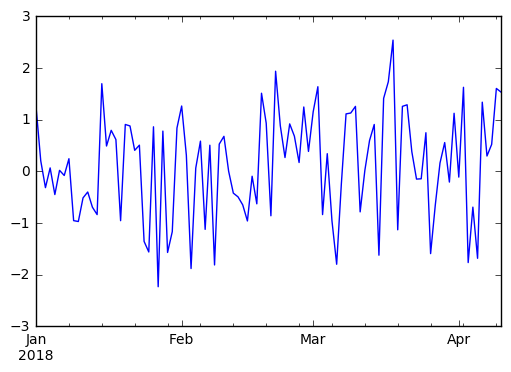

In [51]:
%matplotlib inline
dfday['Bei'].plot()

### 8.4 向量转换

In [73]:
#apply函数统计每列非0值的个数
import numpy as np
s_df.apply(np.count_nonzero)  #对s_df的所有列进行向量转换

No        6
age       6
gender    6
gpa       6
major     6
gpa_r     6
dtype: int64

In [74]:
def ad_gpa(s):
    if s>=3:
        return s+0.1
    else:
        return s+0.3
s_df['gpa'].apply(ad_gpa)  #对s_df的gpa列进行向量转换


0    2.8
1    2.5
2    3.3
3    3.2
4    2.5
5    2.8
Name: gpa, dtype: float64

In [75]:
s_df['gpa'].apply(lambda s:s+0.1 if s>=3 else s+0.3)  #使用匿名函数

0    2.8
1    2.5
2    3.3
3    3.2
4    2.5
5    2.8
Name: gpa, dtype: float64

In [76]:
s_df.applymap(lambda s: np.nan if s=='' else s)

,No,age,gender,gpa,major,gpa_r
0,BS001,18,F,2.5,EC,0.914634
1,BS002,21,M,2.2,TR,0.880000
2,BS005,23,M,3.2,EC,1.170732
3,BS007,19,M,3.1,TR,1.240000
4,BS009,28,F,2.2,TR,0.880000
5,BS012,22,F,2.5,EC,0.914634
